In [14]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, HalvingRandomSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#Separem les dades
dataset = pd.read_csv("../data/datasetFinal.csv", header ='infer', low_memory=False)
y = dataset.MIS_Status
X = dataset.drop(['MIS_Status'], axis=1)
y = y[:100000]
X = X.iloc[:100000, :]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [3]:
x_train

,Unnamed: 0,Term,NoEmp,NewExist,UrbanRural,LowDoc,SBA_Appv,Sector_Points,State_Points,IscreateJob,IsRetained,IsFranchise
31265,31555,7,5,1.000,1,0,8.517,2,3,0,1,1
3537,3581,7,1,1.000,1,0,10.127,1,3,0,0,1
57343,57906,5,6,1.000,2,0,12.835,2,5,0,0,1
86296,87049,7,1,1.000,1,0,8.517,3,2,1,1,0
52384,52917,2,7,1.000,2,0,10.820,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46220,46712,15,2,2.000,0,1,9.729,0,5,0,0,1
98804,99620,7,2,2.000,1,0,8.517,2,4,0,1,0
48045,48548,7,5,1.000,1,0,10.820,3,2,0,1,0
70053,70724,7,2,2.000,1,0,10.127,3,3,1,1,0


In [4]:
criteris = ['gini', 'entropy']
for crit in criteris:
    clf = RandomForestClassifier(criterion=crit, max_depth=10, random_state=30, class_weight="balanced")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(crit)
    print(classification_report(y_test,y_pred))

gini
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6161
           1       0.97      0.89      0.93     18839

    accuracy                           0.89     25000
   macro avg       0.85      0.90      0.86     25000
weighted avg       0.91      0.89      0.90     25000

entropy
              precision    recall  f1-score   support

           0       0.71      0.90      0.80      6161
           1       0.97      0.88      0.92     18839

    accuracy                           0.89     25000
   macro avg       0.84      0.89      0.86     25000
weighted avg       0.90      0.89      0.89     25000



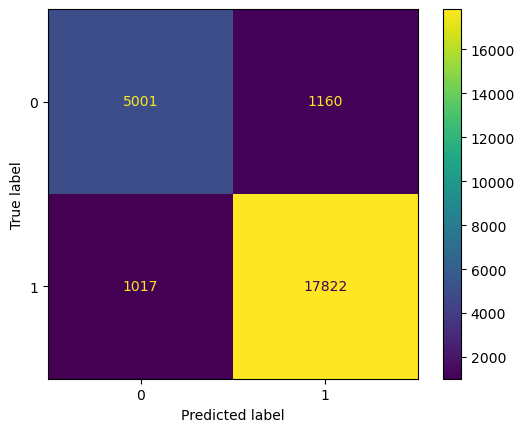

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      6161
           1       0.94      0.95      0.94     18839

    accuracy                           0.91     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.91      0.91      0.91     25000



In [5]:
clf = RandomForestClassifier(criterion="gini", random_state=30, class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=clf.classes_)

disp.plot()
plt.show()
print(classification_report(y_test,y_pred))

E:\oriol\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


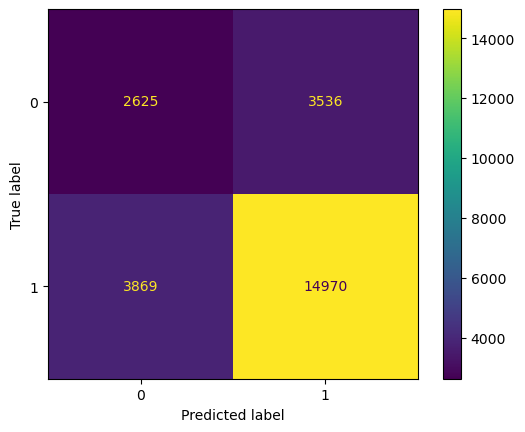

              precision    recall  f1-score   support

           0       0.40      0.43      0.41      6161
           1       0.81      0.79      0.80     18839

    accuracy                           0.70     25000
   macro avg       0.61      0.61      0.61     25000
weighted avg       0.71      0.70      0.71     25000



In [6]:
clf2 = LinearSVC(random_state=30, class_weight="balanced")

clf2.fit(x_train, y_train)

y_pred = clf2.predict(x_test)

cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=clf.classes_)

disp.plot()
plt.show()

print(classification_report(y_test,y_pred))

In [21]:
clf3 = DecisionTreeClassifier(max_depth=10, random_state=30, n_jobs = 5)
clf3.fit(x_train, y_train)

y_pred = clf3.predict(x_test)

cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=clf.classes_)

disp.plot()
plt.show()

print(classification_report(y_test,y_pred))

TypeError: __init__() got an unexpected keyword argument 'n_jobs'

E:\oriol\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


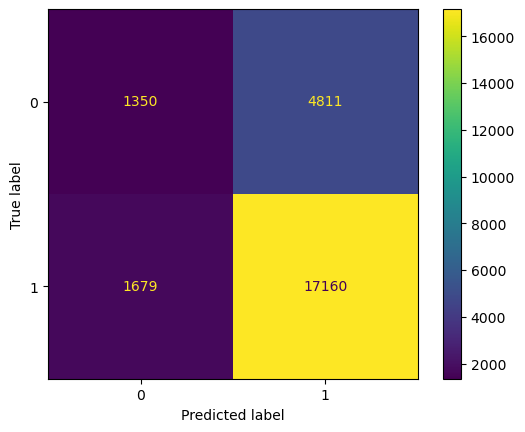

              precision    recall  f1-score   support

           0       0.45      0.22      0.29      6161
           1       0.78      0.91      0.84     18839

    accuracy                           0.74     25000
   macro avg       0.61      0.56      0.57     25000
weighted avg       0.70      0.74      0.71     25000



In [20]:
clf4 = KNeighborsClassifier(n_neighbors = 5, n_jobs = 5)
clf4.fit(x_train, y_train)

y_pred = clf4.predict(x_test)

cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cf, display_labels=clf.classes_)

disp.plot()
plt.show()

print(classification_report(y_test,y_pred))

In [8]:
#escollim el random forest amb gini
clf = RandomForestClassifier(criterion="gini", max_depth=10, random_state=30, class_weight="balanced")
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_proba = clf.predict_proba(x_test)

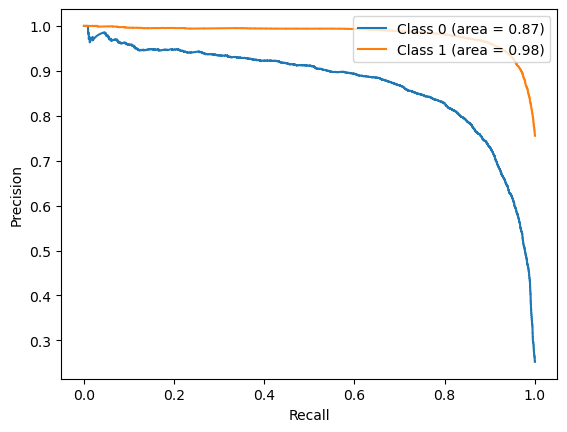

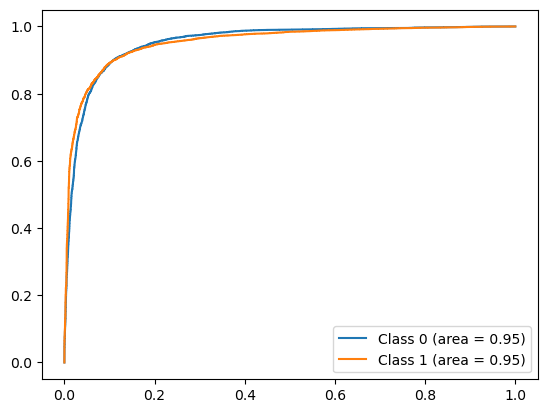

In [9]:
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_proba[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_proba[:, i])

    plt.plot(recall[i], precision[i],
    label='Class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

<Figure size 1500x800 with 0 Axes>

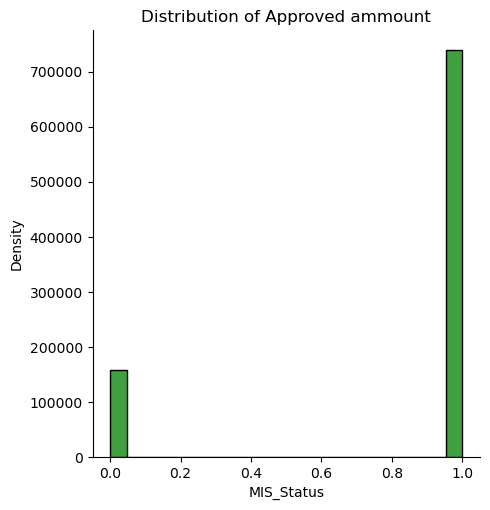

In [10]:
plt.figure(figsize=(15, 8))
sns.displot(dataset['MIS_Status'], color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

<Figure size 1500x800 with 0 Axes>

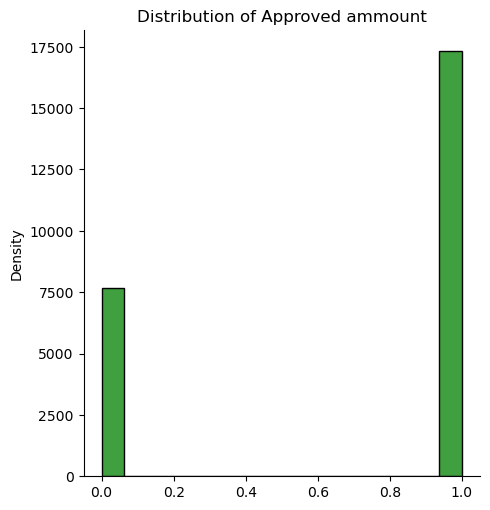

In [11]:
plt.figure(figsize=(15, 8))
sns.displot(y_pred, color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [12]:
pred_percent_0 = len(y_pred[y_pred==0])/len(y_pred)
pred_percent_1 = 1-pred_percent_0
test_percent_0 = len(y_test[y_test==0])/len(y_test)
test_percent_1 = 1 - test_percent_0
print("               0    1")
print("% of predict: ",round(pred_percent_0, 2), round(pred_percent_1, 2))
print("% of test:    ",round(test_percent_0, 2), round(test_percent_1,2))

               0    1
% of predict:  0.31 0.69
% of test:     0.25 0.75
